In [36]:
pip install tensorflow

     |████████████████████████████████| 175.5 MB 13.4 MB/s eta 0:00:01     |███████████████████████████▌    | 150.7 MB 1.3 MB/s eta 0:00:19
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached h5py-2.10.0-cp38-cp38-macosx_10_9_x86_64.whl (3.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing /Users/zhiyulin/Library/Caches/pip/wheels/5f/fd/9e/b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73/wrapt-1.12.1-cp38-cp38-macosx_10_9_x86_64.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.32.0-cp38-cp38-macosx_10_9_x86_64.whl (3.3 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
Processing /Users/zhiyulin/Library/Caches/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501/termcolor-1.1.0-py3-none-any.whl
     |████████████████████████████████| 462 kB 12.1 MB/

In [38]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Processing /Users/zhiyulin/Library/Caches/pip/wheels/13/90/db/290ab3a34f2ef0b5a0f89235dc2d40fea83e77de84ed2dc05c/PyYAML-5.3.1-cp38-cp38-macosx_10_9_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [39]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
import random
from keras.preprocessing.image import load_img

print (tf.__version__)

2.4.0


In [41]:
train_dir = "/Users/zhiyulin/Desktop/birds_sub/train"
valid_dir = "/Users/zhiyulin/Desktop/birds_sub/valid"
test_dir = "/Users/zhiyulin/Desktop/birds_sub/test"

In [42]:
labels = os.listdir(train_dir)
print(labels)

['AMERICAN REDSTART', 'AMERICAN COOT', '.DS_Store', 'AMERICAN AVOCET', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN BITTERN', 'AMERICAN PIPIT', 'ALBATROSS', 'AFRICAN FIREFINCH', 'ALEXANDRINE PARAKEET']


In [44]:
height=224
width = 224
batch_size = 128

train_datagen = keras.preprocessing.image.ImageDataGenerator( 
                                            rescale=1./255, 
                                            rotation_range=40, 
                                            width_shift_range=0.2,
                                            height_shift_range=0.2, 
                                            zoom_range=0.2,
                                            horizontal_flip=True, 
                                            fill_mode='nearest'
)
train_generator = train_datagen.flow_from_directory(
                                            train_dir,
                                            target_size = (height, width),
                                            batch_size = batch_size,
                                            shuffle=True,
                                            class_mode='categorical'
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                                            rescale = 1./255
)

test_generator = test_datagen.flow_from_directory(
                                            test_dir,
                                            target_size = (height, width),
                                            batch_size = batch_size,
                                            shuffle = False,
                                            class_mode = "categorical"
)

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
                                            rescale = 1./255
)

valid_generator = valid_datagen.flow_from_directory(
                                            valid_dir,
                                            target_size = (height, width),
                                            batch_size = batch_size,
                                            shuffle = False,
                                            class_mode = "categorical"
)

train_num = train_generator.samples
test_num = test_generator.samples
valid_num = valid_generator.samples

print(train_num, test_num, valid_num)

Found 1526 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
1526 50 50


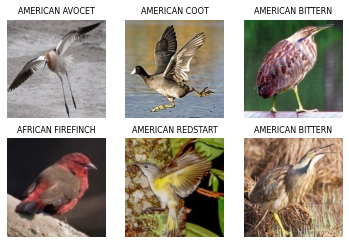

In [46]:
def label_images2(DIR, dataset):
    label = []
    image = []
    j=0
    for i in range (0,30):
        j = random.randint(0, len(dataset.filenames))
        label.append(dataset.filenames[j].split('/')[0])
        image.append(DIR + '/' + dataset.filenames[j])
    return [label,image]

#plot the random images.
y,x = label_images2(train_dir,train_generator )

for i in range(0,6):
    X = load_img(x[i])
    plt.subplot(2,3,+1 + i)
    plt.axis(False)
    plt.title(y[i], fontsize=8)
    plt.imshow(X)
plt.show()

In [53]:
from pandas.core.frame import DataFrame
import pandas as pd

bird_name = []
train_n = []
test_n = []
valid_n = []

for bird in os.listdir(train_dir):
    if bird != '.DS_Store':
        count_train = 0
        for d in os.listdir(train_dir + '/' + bird):
            count_train = count_train + 1
        count_test = 0
        for d in os.listdir(test_dir + '/' + bird):
            count_test = count_test + 1
        count_valid = 0
        for d in os.listdir(valid_dir + '/' + bird):
            count_valid = count_valid + 1
        bird_name.append(bird)
        train_n.append(count_train)
        test_n.append(count_test)
        valid_n.append(count_valid)
list_bird = {"Bird Name":bird_name,"Train Number":train_n,"Test Number":test_n,"Valid Number":valid_n}
data = DataFrame(list_bird)
print(data)

              Bird Name  Train Number  Test Number  Valid Number
0     AMERICAN REDSTART           139            5             5
1         AMERICAN COOT           158            5             5
2       AMERICAN AVOCET           179            5             5
3    AMERICAN GOLDFINCH           133            5             5
4      AMERICAN KESTREL           130            5             5
5      AMERICAN BITTERN           170            5             5
6        AMERICAN PIPIT           179            5             5
7             ALBATROSS           133            5             5
8     AFRICAN FIREFINCH           140            5             5
9  ALEXANDRINE PARAKEET           165            5             5


In [56]:
covn_base = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False)
covn_base.trainable = True

for layers in covn_base.layers[:-32]:
    layers.trainable = False

model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, None, None, 2048)  20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 20,881,970
Trainable params: 9,498,834
Non-trainable params: 11,383,136
_________________________________________________________________


In [57]:
epochs = 10

Early_sp = EarlyStopping(monitor = 'val_accuracy', patience = 5,restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)

history = model.fit(
                    train_generator,
                    steps_per_epoch = train_num // batch_size,
                    epochs = epochs,
                    validation_data = valid_generator,
                    validation_steps = valid_num // batch_size,
                    callbacks = [Early_sp,reduce_lr]
)


Epoch 1/10
11/11 [==============================] - 143s 13s/step - loss: 2.0407 - accuracy: 0.3918
Epoch 2/10
11/11 [==============================] - 171s 16s/step - loss: 0.9507 - accuracy: 0.9411
Epoch 3/10
11/11 [==============================] - 155s 13s/step - loss: 0.3411 - accuracy: 0.9711
Epoch 4/10
11/11 [==============================] - 134s 12s/step - loss: 0.1484 - accuracy: 0.9801
Epoch 5/10
11/11 [==============================] - 134s 12s/step - loss: 0.0819 - accuracy: 0.9873
Epoch 6/10
11/11 [==============================] - 141s 13s/step - loss: 0.0524 - accuracy: 0.9938
Epoch 7/10
11/11 [==============================] - 143s 13s/step - loss: 0.0420 - accuracy: 0.9961
Epoch 8/10
11/11 [==============================] - 143s 13s/step - loss: 0.0346 - accuracy: 0.9952
Epoch 9/10
11/11 [==============================] - 148s 13s/step - loss: 0.0290 - accuracy: 0.9934
Epoch 10/10
11/11 [==============================] - 155s 14s/step - loss: 0.0236 - accuracy: 0.9998

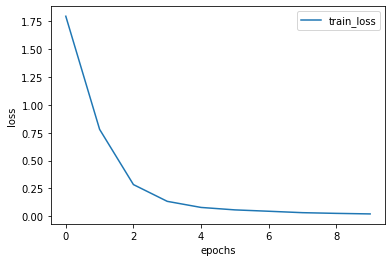

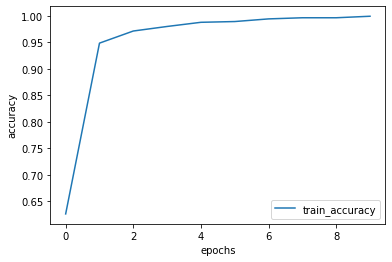

In [59]:
history_dict = history.history
train_loss = history_dict["loss"]
train_accuracy = history_dict["accuracy"]

# figure 1
plt.figure()
plt.plot(range(epochs), train_loss, label='train_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

# figure 2
plt.figure()
plt.plot(range(epochs), train_accuracy, label='train_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [60]:
scores = model.evaluate(test_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1/1 [==============================] - 4s 4s/step - loss: 0.0218 - accuracy: 0.9800
Test loss: 0.021768618375062943
Test accuracy: 0.9800000190734863


In [61]:
test_generator

In [63]:
prediction = model.predict(test_generator)

In [65]:
prediction.shape

(50, 10)

In [66]:
pred_class = [np.argmax(e) for e in prediction]

Confusion matrix, without normalization


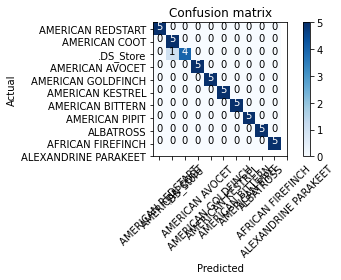

In [70]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()

cm = confusion_matrix(test_generator.classes, pred_class)
plot_confusion_matrix(cm, classes = labels)